# DataLoader

In [1]:
import numpy as np
import pandas as pd
import os
import keras
from utils import Plot_Batch

from tqdm import tqdm
from math import ceil
from netCDF4 import Dataset
from preprocess import Preprocess, Zero_One, Normalizer
from generator import Basic_Generator

data_folder="Data"
B = Basic_Generator(data_folder)
header_dict = ['rl', 'ri', 'ql', 'qi', 'q', 'ts', 't', 'emis', 'o3', 'pl']

Using TensorFlow backend.
/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


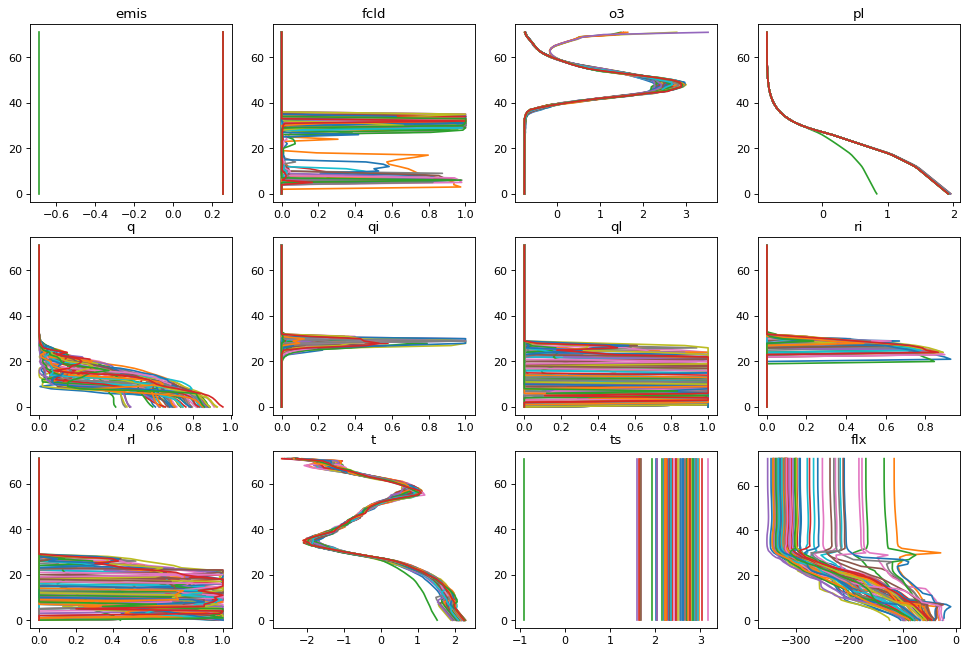

In [7]:
B =Preprocessed_Generator(data_folder, preprocess_x=[D])
x,y = B[3]
Plot_Batch(x,y[:,-3,:], B.variables)

In [8]:
B=Diff_Generator(preprocess_x=[D])
for x,y in tqdm(B):
    pass

100%|██████████| 19440/19440 [01:30<00:00, 213.68it/s]


In [13]:
if(True):
    print("Fitting Dict")
    B = Basic_Generator(data_folder, train=True) 
    print(B.List_of_dir)
    xdim, ydim = B.Xdim, B.Ydim
    B = Basic_Generator(data_folder, batch_size=xdim*ydim, shuffle=False, )
    D = DictPrepross(header_dict, fct)
    D.fitonGen(B)
    Dhd = D.to_array_save()
    Dhd.to_hdf('DictPreprocess_fit.hdf5', key='s')
    print("Fitting Dict")
    B = Basic_Generator(data_folder, train=False) 
    print(B.List_of_dir)
    xdim, ydim = B.Xdim, B.Ydim
    B = Basic_Generator(data_folder, batch_size=xdim*ydim, shuffle=False, )
    D = DictPrepross(header_dict, fct)
    D.fitonGen(B)
    Dhd = D.to_array_save()
    Dhd.to_hdf('DictPreprocess_fit_test.hdf5', key='s')

Fitting Dict
['Data/20190331_2200z', 'Data/20190401_0000z']
rl
ri
ql
qi
q
ts
t
emis
o3
pl
Fitting Dict
['Data/20190401_0200z']
rl
ri
ql
qi
q
ts
t
emis
o3
pl


In [16]:
Dhd = pd.read_hdf('DictPreprocess_fit.hdf5', key='s')
D = DictPrepross([], [])
D.load_from_pd(Dhd)
Dhd = pd.read_hdf('DictPreprocess_fit_test.hdf5', key='s')
D2 = DictPrepross(header_dict, fct)
D2.load_from_pd(Dhd)

In [17]:
print(D)
print(D2)

emis : type : Normalizer 
fitted : True 
values : (0.9890608787536621, 0.006443938706070185) 
  
o3 : type : Normalizer 
fitted : True 
values : (3.6597821235773154e-06, 4.7702924348413944e-06) 
  
pl : type : Normalizer 
fitted : True 
values : (30594.45703125, 36118.08203125) 
  
q : type : Zero_One 
fitted : True 
values : (0.020224308595061302, 1.8337337924560727e-15) 
  
qi : type : Zero_One 
fitted : True 
values : (0.0010000000474974513, 0.0) 
  
ql : type : Zero_One 
fitted : True 
values : (0.0010000000474974513, 0.0) 
  
ri : type : Zero_One 
fitted : True 
values : (0.00010348010255256668, 1.4999999621068127e-05) 
  
rl : type : Zero_One 
fitted : True 
values : (2.099999983329326e-05, 4.999999873689376e-06) 
  
t : type : Normalizer 
fitted : True 
values : (243.3359832763672, 25.461942672729492) 
  
ts : type : Normalizer 
fitted : True 
values : (283.5641174316406, 6.850484848022461) 
  

emis : type : Normalizer 
fitted : True 
values : (0.9890608787536621, 0.00644393870

In [4]:
P = Preprocessed_Generator(preprocess_x=[D], preprocess_y=[Diff],custom_b_p_e = 10)

# OLD

In [2]:
batch_size = 64
HNn = [128,64,16,4] # hidden layer size
header = list(x.keys())[6:] # variables are relevant after "time"
kernels = []
testprop = 0.9
seed = 0
n,p = x['Xdim'].shape[0],x['Ydim'].shape[0]

np.random.seed(seed)
d = len(header) + np.sum(np.array( [len(k.header) for k in kernels]  ))
batch_per_epoch = int(n*p / batch_size)

header_dict = ["ql","qi","q","rl","ri","ts","t", "pl","emis","o3"]  # variable we preprocess
fct = [] # how to preprocess them
for i in range(5):
    fct.append(Zero_One())
for j in range(5):
    fct.append(Normalizer())
    
D = DictPrepross(header_dict, fct)
del(fct)
D.fitonNetCDF(x)

In [ ]:
train_generator =  lambda Params, batch_size, nb=-1 : generate_rnn( \
                            Params[0], Params[1], kernels=kernels,\
                            train_prop=testprop, header=header,\
                            batch_size = batch_size, maxbatch=nb,  preprocess=D, test_data=False)

test_generator = lambda Params, batch_size, nb=1 : generate_rnn( \
                            Params[0], Params[1], kernels=kernels,\
                            train_prop=testprop, header=header,\
                            batch_size = batch_size, maxbatch=nb, preprocess=D, test_data=True)

In [44]:
select_folder = np.random.randint(len(List_of_dir))
select_element = np.random.randint(div)

print(select_folder, select_element)
files = os.listdir(List_of_dir[select_folder])
for f in files:
    if '_in' in f and str(select_element)+'.' in f:
        input_path = os.path.join(List_of_dir[select_folder], f)
    if '_out' in f and str(select_element)+'.' in f:
        output_path = os.path.join(List_of_dir[select_folder], f)

0 1
